Projekt dotyczy analizy danych zawartych w zbiorze dotyczącym osiągnięć uczniów szkół średnich z dwóch portugalskich szkół.

Dane zawierają oceny uczniów, cechy demograficzne, społeczne i szkolne.

Używam bibliotek:

In [121]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Pobieram dane:

In [122]:
student_performance = fetch_ucirepo(id=320)

In [123]:
columns_to_hot_encode = []
for col in student_performance.data.features:
    if (student_performance.data.features[col].dtype == 'object'):
        columns_to_hot_encode.append(col)
        
features = pd.get_dummies(student_performance.data.features, columns=columns_to_hot_encode)

In [124]:
student_performance = fetch_ucirepo(id=320)
X =features
y = student_performance.data.targets 

Tworzę macierz korelacji i wybieram najważniejsze parametry:

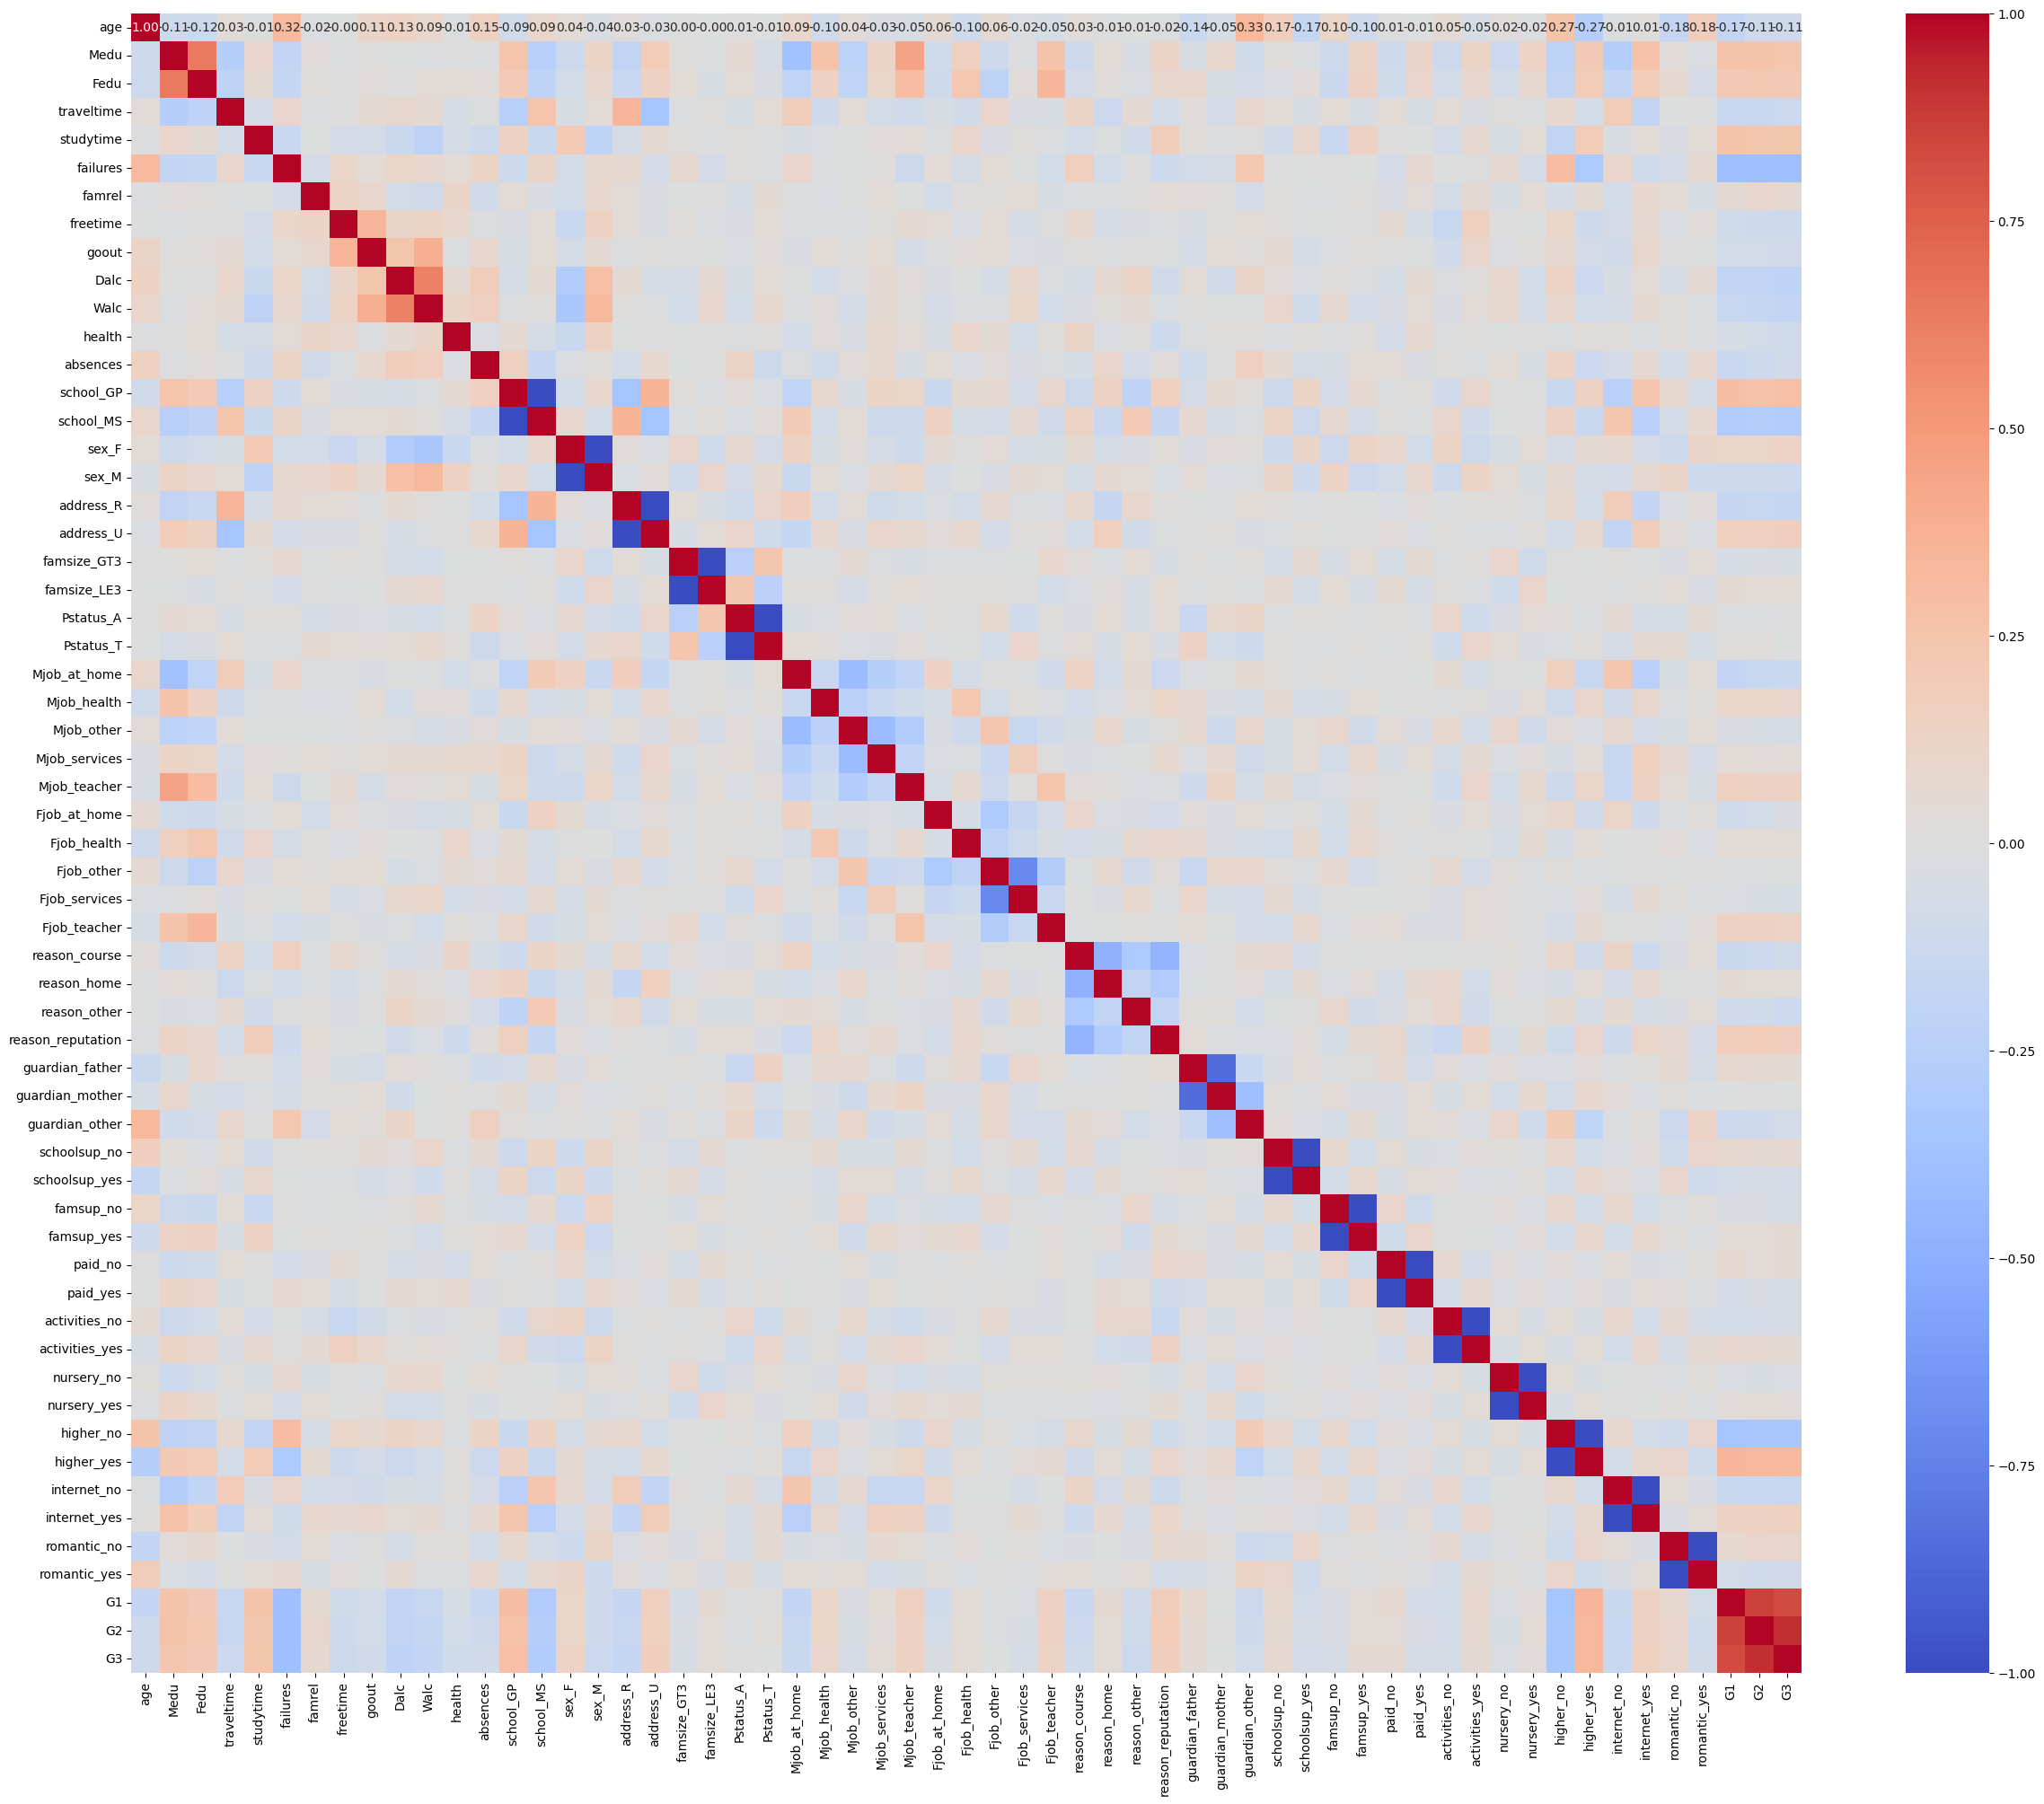

In [125]:
C = pd.concat([X, student_performance.data.targets], axis=1)
correlation_matrix = C.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Wnioski:  
Z otrzymanej macierzy korelacji można wywnioskować, że największy wpływ na wyniki uczniów mają:
- Wykształcenie matki (Medu).
- Wykształcenie ojca (Fedu).
- Czas nauki (studytime).
- Przynależność ucznia do szkoły "Gabriel Pereira" (school_GP).
- Czy uczeń chce uzyskać wykształcenie wyższe (higher_yes).
- Czy uczeń nie zaliczył przedmiotów (failures).
- Wyniki w pozostałych latach nauki w szkole średniej (G1, G2, G3).

Dzielę dane na testowe i treningowe. Uwzględniam tylko te które mają największy wpływ na wyniki w nauce:

In [126]:
important_features = features[['Medu', 'Fedu', 'studytime', 'school_GP', 'higher_yes', "failures"]]
X_train, X_test, y_train, y_test = train_test_split(important_features, y, test_size=0.3, random_state=49)

Tworzę trzy drzewa decyzyjne, oddzielnie dla wyników z pierwszego, drugiego i trzeciego roku: 

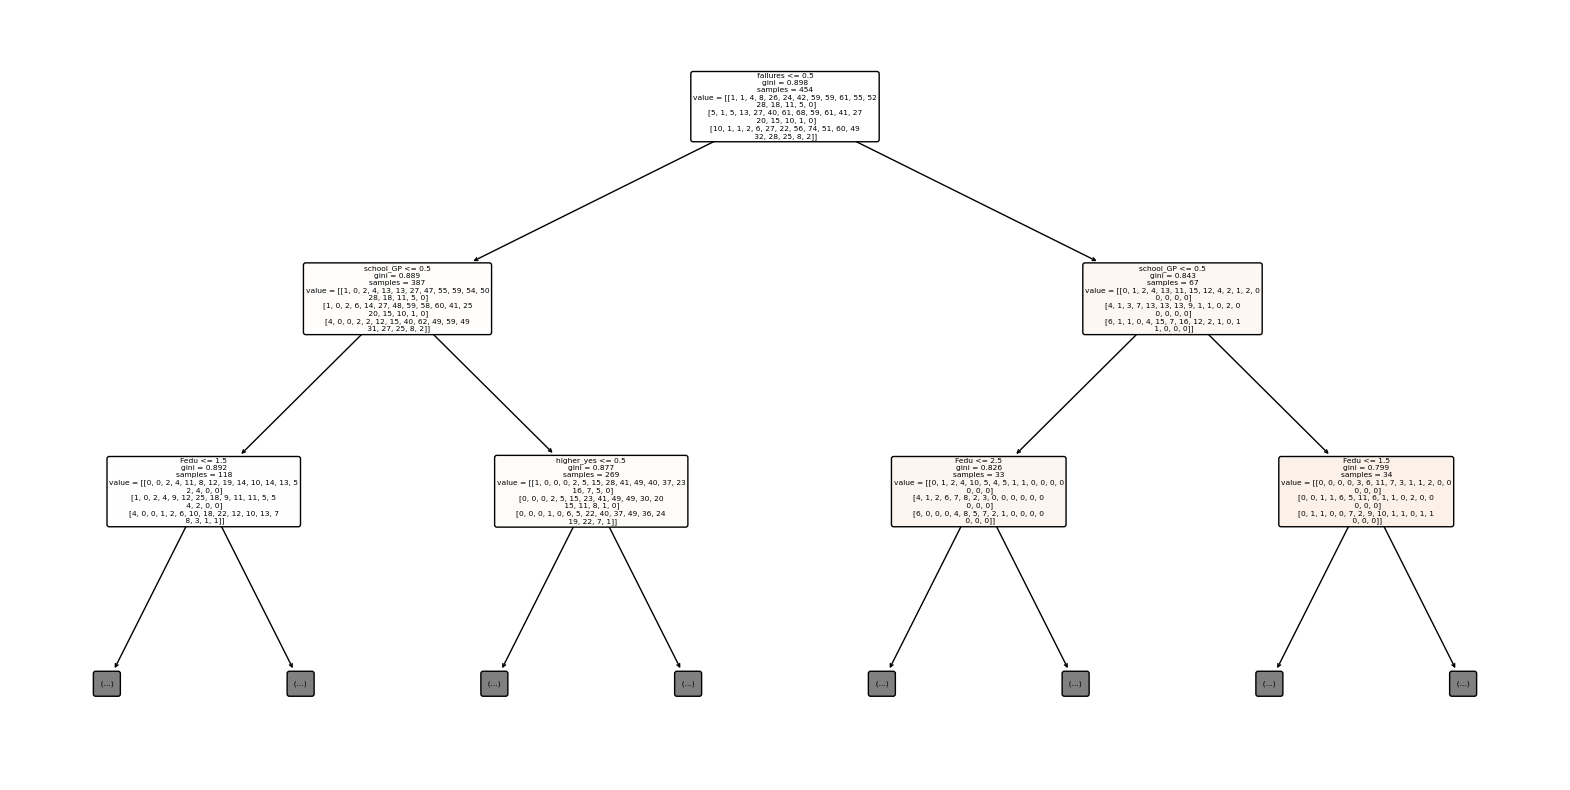

In [127]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=X_train.columns, 
          max_depth=2)
plt.show()

Drzewo decyzyjne dla wyników pierwszego roku (G1):

In [ ]:
y_G1 = student_performance.data.targets['G1']
X_train, X_test, y_train, y_test = train_test_split(important_features, y_G1, test_size=0.3, random_state=49)
dt_classifier = DecisionTreeClassifier(random_state=random.randint(0,111))
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=X_train.columns, 
          max_depth=2)
plt.show()


0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64